# Load image

In [41]:
! pip install tensorflow==2.16.2

In [42]:
! pip uninstall numpy -y
! pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_10_9_x86_64.whl (20.6 MB)


In [43]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [44]:
! pwd

/Users/luckas/code/mahshid90/waste_classification/notebooks


In [368]:
img = load_img("/Users/luckas/code/mahshid90/waste_classification/raw_data/test_data/w_trash_q.jpg")

# Preprocess image

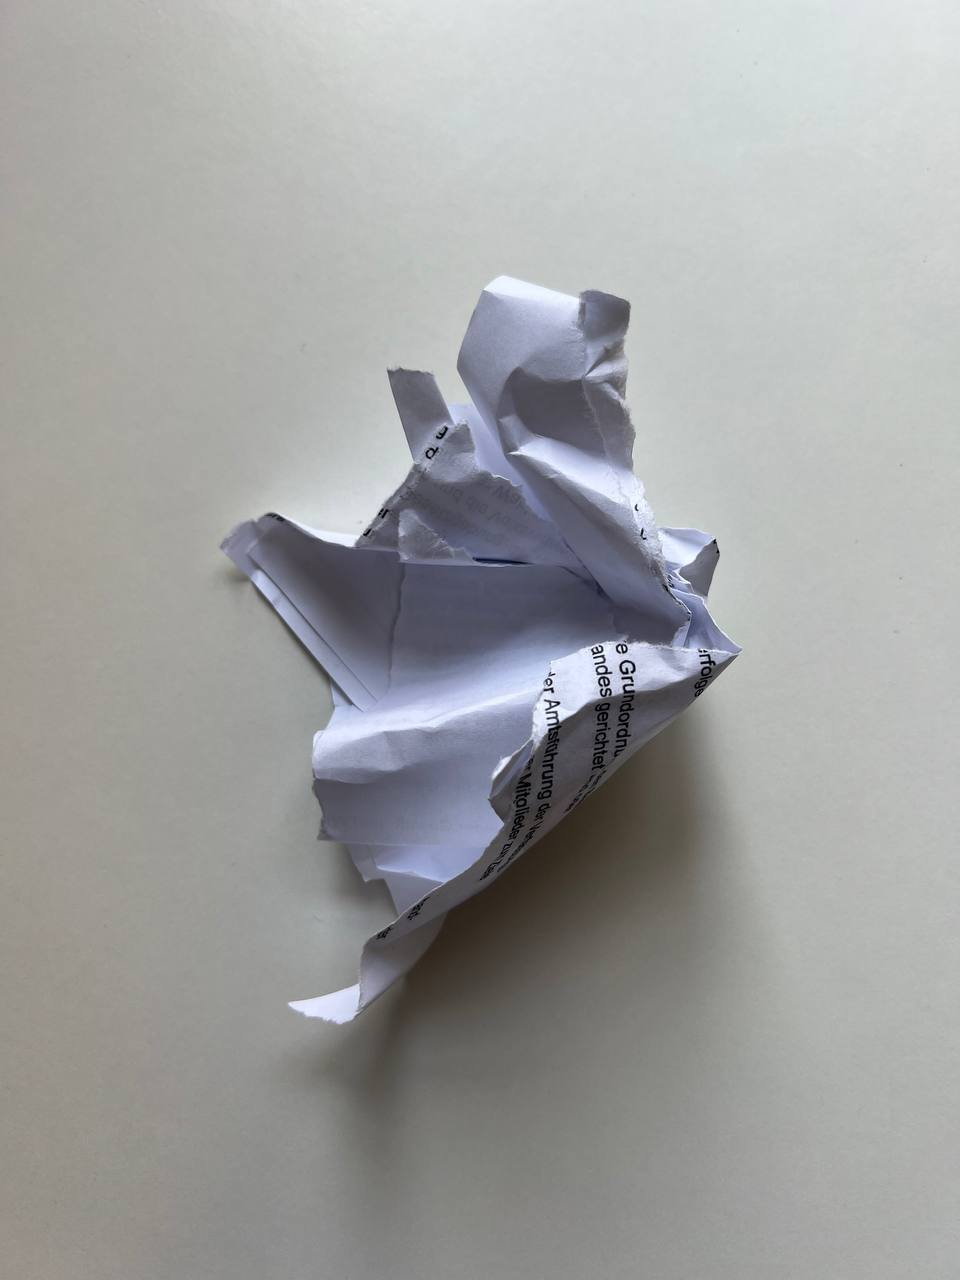

In [369]:
img

In [370]:
from PIL import Image

In [371]:
# Resize to 384x384
img = img.resize((384, 384))

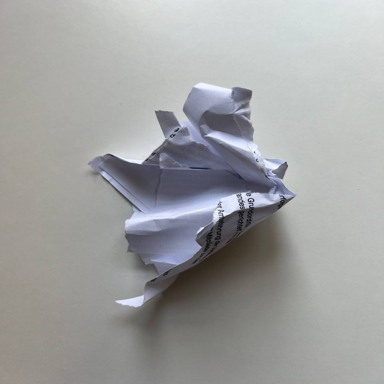

In [372]:
img

In [373]:
img = img_to_array(img)  # We don't divide by 255 here because the custom preprocessing from ResNet which we apply later does that already

In [374]:
img

array([[[170., 164., 164.],
        [171., 165., 165.],
        [172., 166., 166.],
        ...,
        [225., 229., 230.],
        [224., 228., 229.],
        [223., 227., 228.]],

       [[169., 163., 163.],
        [170., 164., 164.],
        [170., 164., 164.],
        ...,
        [225., 229., 230.],
        [224., 228., 229.],
        [223., 227., 228.]],

       [[168., 162., 162.],
        [169., 163., 163.],
        [171., 165., 165.],
        ...,
        [224., 228., 229.],
        [223., 227., 228.],
        [222., 226., 227.]],

       ...,

       [[152., 145., 137.],
        [151., 144., 136.],
        [152., 145., 137.],
        ...,
        [172., 174., 173.],
        [171., 173., 172.],
        [169., 171., 170.]],

       [[151., 144., 136.],
        [150., 143., 135.],
        [151., 144., 136.],
        ...,
        [171., 173., 172.],
        [171., 173., 172.],
        [170., 172., 171.]],

       [[151., 144., 136.],
        [150., 143., 135.],
        [151., 1

In [375]:
x = img.reshape((-1, 384, 384, 3))


In [376]:
x

array([[[[170., 164., 164.],
         [171., 165., 165.],
         [172., 166., 166.],
         ...,
         [225., 229., 230.],
         [224., 228., 229.],
         [223., 227., 228.]],

        [[169., 163., 163.],
         [170., 164., 164.],
         [170., 164., 164.],
         ...,
         [225., 229., 230.],
         [224., 228., 229.],
         [223., 227., 228.]],

        [[168., 162., 162.],
         [169., 163., 163.],
         [171., 165., 165.],
         ...,
         [224., 228., 229.],
         [223., 227., 228.],
         [222., 226., 227.]],

        ...,

        [[152., 145., 137.],
         [151., 144., 136.],
         [152., 145., 137.],
         ...,
         [172., 174., 173.],
         [171., 173., 172.],
         [169., 171., 170.]],

        [[151., 144., 136.],
         [150., 143., 135.],
         [151., 144., 136.],
         ...,
         [171., 173., 172.],
         [171., 173., 172.],
         [170., 172., 171.]],

        [[151., 144., 136.],
       

In [377]:
x.shape

(1, 384, 384, 3)

# Load model


In [378]:
import tensorflow as tf

In [379]:
model = tf.keras.models.load_model("../models/custom_resnet50_model_v3.keras")

In [380]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [381]:
x = preprocess_input(x)

# Predict

In [382]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [383]:
prediction = model.predict(x)
predicted_class = classes[(np.argmax(prediction[0]))]
print(predicted_class)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
trash
[[3.0094886e-01 2.0823951e-05 3.7270714e-02 2.6497787e-01 7.0799302e-05
  3.9671093e-01]]
